# This is a Cyclistice Bike riders analysis

It is target at analysing the preference of bike riders and the days most ride takes place either by full members or casuals.
Recommendations from analysis will be also put forward to the marketing team as to how to get casual members become full members.

The fist step is to load the neccasry python librairies that will read data, ana;yse data and give visuals that can aid spot on understanding and therefater make recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
Jan = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202101-divvy-tripdata.csv')
Feb = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202102-divvy-tripdata.csv')
Mar = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202103-divvy-tripdata.csv')
Apr = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202104-divvy-tripdata.csv')
May = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202105-divvy-tripdata.csv')
Jun = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202106-divvy-tripdata.csv')
Jul = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202107-divvy-tripdata.csv')
Aug = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202108-divvy-tripdata.csv')
Sep = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202109-divvy-tripdata.csv')
Oct = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202110-divvy-tripdata.csv')
Nov = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202111-divvy-tripdata.csv')
Dec = pd.read_csv('C:/Users/pc/Desktop/Bikeshare/202112-divvy-tripdata.csv')

In [3]:
# lets merge the dataset into one data frame

year_ride = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]).reset_index(drop=True)

In [4]:
# We will check out the data structure

year_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [8]:
# View the dataset
year_ride

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


The dataset has 13 columns to work with and the data type is clear to us now

In [9]:
# It's important that we check for missing values in each column

year_ride.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

In [29]:
# Then we also check for duplicattes

year_bike = ~ year_ride.duplicated()
year_ride = year_ride[year_bike]

There are inconsistencies with our data, this is obviuos as it reflects in the columns such as the end_station_id, start_station_id, end_station_name and start_station_name which have over 700000 missing records while the end_lng and end_lat have 4771 missing values. However, the total number rows are very plenty, hence I will remove rows with missing values without affecting my ananlysis. Furthermore, the end_at and started_at will be splitted into time and date seperate columns. Then I will rename some columns for ease of handling.

In [30]:
# Doing more to delete rows with NA values

year_ride = year_ride.dropna().reset_index(drop=True)

In [12]:
# Ensuring date format

year_ride['started_at'] = pd.to_datetime(year_ride['started_at'])
year_ride['ended_at'] = pd.to_datetime(year_ride['ended_at'])

In [13]:
# rename columns for ease of understanding

year_ride.rename(columns={'rideable_type':'bike_type','started_at':'start_date','ended_at':'end_date', 'member_casual':'customer_type'}, inplace=True)

The data is tidy and good for use, the next step will be to add new columns from information gotten from the dataset. So let's add trip duration, days and month column. And rename the variables in the customer_type column. The casual will be renamed casual riders while the member will be renamed subscribers, this is to make it easy for analysis.

In [14]:
# Add some new columns

year_ride['days'] = year_ride.start_date.dt.day_name()
year_ride['month'] = year_ride.start_date.dt.month_name()
tsecs = (year_ride['end_date'] - year_ride['start_date']).dt.total_seconds()
year_ride['trip_duration'] = tsecs/60
year_ride['trip_duration'] = year_ride['trip_duration'].astype(int)

In [17]:
year_ride["customer_type"].replace({"member":"subscriber", "customer":"casual riders"}, inplace=True)

# DATA EXPLORATION AND VISUALIZATION
The main objective is to understand the behavior of casual riders and from the analysis provide recommendations that would ensure that they turn into subscribers (annual membership plan)

In [18]:
# Let's annalyse the mean daily average trips of casual riders

casual = year_ride['customer_type'] == "casual"
casual_riders = year_ride[casual]
mean_daily_trip = casual_riders.groupby('days').agg(mean_trip_duration=('trip_duration', 'mean'))

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
mean_daily_trip['day_id'] = mean_daily_trip.index
mean_daily_trip['day_id'] = mean_daily_trip['day_id'].map(sorterIndex)
mean_daily_trip.sort_values('day_id', inplace=True)
mean_daily_trip

,mean_trip_duration,day_id
days,,
Sunday,37.108356,0
Monday,32.146748,1
Tuesday,28.312329,2
Wednesday,27.778274,3
Thursday,27.519551,4
Friday,30.427603,5
Saturday,34.381732,6


Text(0, 0.5, 'average trip duration')

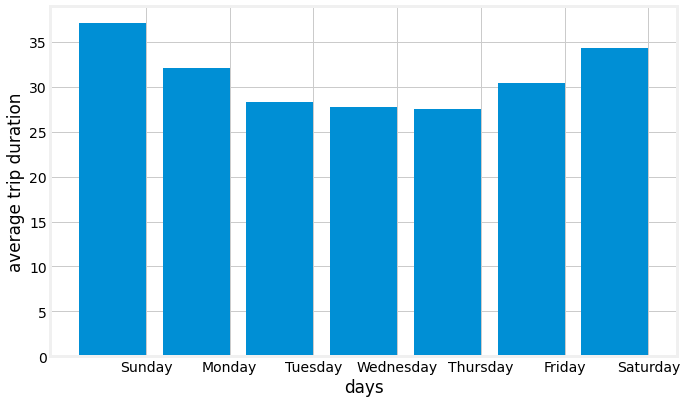

In [19]:
# The next step is to plot the graph 

fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
 
ax.bar(mean_daily_trip.day_id, mean_daily_trip.mean_trip_duration)
ax.set_xticks([x+0.4 for x in mean_daily_trip.day_id])
ax.set_xticklabels(mean_daily_trip.index)
ax.set_facecolor('white')
ax.set_xlabel('days')
ax.set_ylabel('average trip duration')

In [20]:
# Calculate the total monthly rides 

casual = year_ride['customer_type'] == "casual"
casual_riders = year_ride[casual]
total_monthly_rides = casual_riders.groupby('month').agg(total_rides=('start_date', 'count'), average_rides=('trip_duration', 'mean'))

# The monthly usage of cyclistic services by casual riders

sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorterIndex = dict(zip(sorter,range(len(sorter))))
total_monthly_rides['month_id'] = total_monthly_rides.index
total_monthly_rides['month_id'] = total_monthly_rides['month_id'].map(sorterIndex)
total_monthly_rides.sort_values('month_id', inplace=True)
total_monthly_rides

,total_rides,average_rides,month_id
month,,,
January,14690,25.879306,0
February,8613,46.646697,1
March,75642,37.989609,2
April,120420,37.950722,3
May,216829,39.144552,4
June,304192,38.029120,5
July,369415,32.793549,6
August,341476,28.073513,7
September,292931,27.597543,8


Text(0, 0.5, 'total trips')

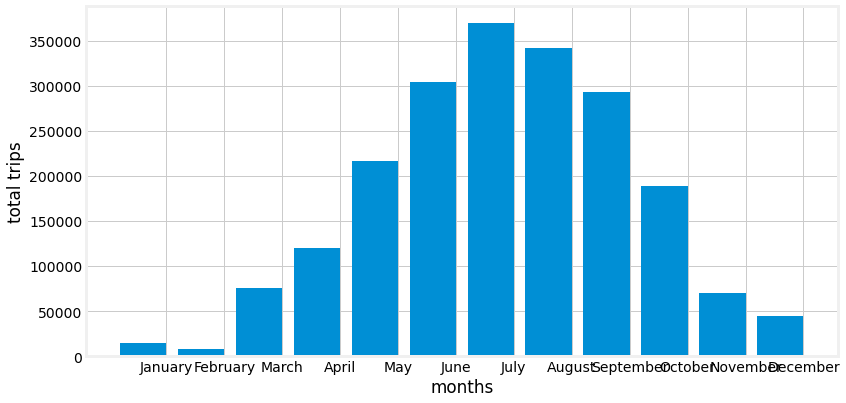

In [21]:
# Furthermore plot the total monthly rides against the months

fig, ax = plt.subplots(figsize=(12,6), facecolor='white')
 
ax.bar(total_monthly_rides.month_id, total_monthly_rides.total_rides)
ax.set_xticks([x+0.4 for x in total_monthly_rides.month_id])
ax.set_xticklabels(total_monthly_rides.index)
ax.set_facecolor('white')
ax.set_xlabel('months')
ax.set_ylabel('total trips')

<AxesSubplot:ylabel='total_ride'>

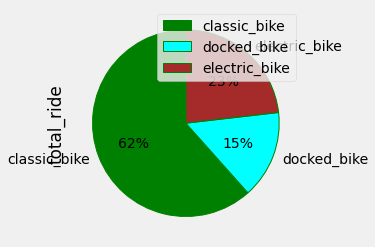

In [28]:
# To understand the bike type usage level among casual customers we will do the below

casual = year_ride['customer_type'] == "casual"
casual_riders = year_ride[casual]
total_monthly_rides = casual_riders.groupby('bike_type').agg(total_ride=('start_date','count')).reset_index()

  
# Create explode data

explode = (0.1, 0.1, 0.0,)
 
# Creating color parameters

colors = ( "green", "cyan", "brown")
 
# And Wedge properties

wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Plotting the pie chart for above dataframe
total_monthly_rides.groupby(['bike_type']).sum().plot(
    kind='pie', y='total_ride', 
  autopct='%1.0f%%', colors=colors, startangle = 90, wedgeprops = wp)



# CONCLUSION

The analysis I carried brought to notice that there is an average increase in ride duration of casual riders during the weekends with Sunday recording the highest average duration of over 35 minutes. Also, the Summer accounts for the period with the most number of rides by casual riders. July witnessed the highest total number of rides with 369415 total number of rides. December, January and February had individul ride totals of below 50000. Finally,the most popular bike type among casual riders is the classic bike while the least popular is docked bike a 15% total usage

*RECOMMENDATION*

In proferring my recommendation, I will recommend to the Cyclistic marketing team to provide cnoversion campaigns that will focus on creating promos for annual memberships during weekends and also Summer periods. Additionally, there should an emphasis for promos on classic bikes as most casual riders (62%) opt for this bike type.

